### K-Means Clustering with Silhouette Scoring

K-Means Clustering is one of the most important clustering technique that is used to form the clusters from the dataset.

1. The dataset given here is Mall_Customers dataset that contains the Customer_ID, Age, Gender, Annual_Income and Spending Score. It depicts about the details of all the customer going to the Mall.

2. Here K-Means Clustering technique is applied on the dataset so as to identify and detect the clusters from the dataset.


### Steps required for this project:-

1.  Import all the necessary libraries

2.  Load the Dataset

3.  Perform EDA and do complete data preprocessing

4.  Select Relevant Features like ['Annual Income','Spending Score']

5. Visualize the dataset based on the relevant features

6. Scale the input data

7. Apply KMeans model and compute the silhouette scores for each data point

8. Visualize the Clusters vs silhouette scores

9. Train the KMeans model with optimal k value and assign the labels to the data

10. Visualize final cluster

### Step 1:  Import all the necessary libraries

In [799]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from   sklearn.model_selection import train_test_split
from   sklearn.preprocessing   import StandardScaler
from   sklearn.cluster         import  KMeans
from   sklearn.metrics         import  silhouette_score

### Step 2:  Load the Dataset

In [800]:
df = pd.read_csv('Mall_Customers.csv')

In [801]:
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


### OBSERVATIONS:

1.  The above dataset contains all the details of the Customers going to the Mall.

2.  The Mall_Customers has the following details like :- 

     (a.)   CustomerID   ------------------->    Customer ID

     (b.)   Genre        ------------------->    Gender of the Customer

     (c.)   Age          ------------------->    Age of the Customer

     (d.)   Annual Income ------------------>    Annual Income of the Customer

     (e.)   Spending Score ----------------->    Spending Score of the Customer

### Step 3: Perform EDA and do complete data preprocessing

In [802]:
### Display the top five rows of the dataset

print(df.head())

   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40


In [803]:
### Display the bottom five rows of the dataset

print(df.tail())

     CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
195         196  Female   35                 120                      79
196         197  Female   45                 126                      28
197         198    Male   32                 126                      74
198         199    Male   32                 137                      18
199         200    Male   30                 137                      83


In [804]:
### Get the total length of the records used in the dataset

print("Total length of the records used in the dataset is:", len(df))

Total length of the records used in the dataset is: 200


In [805]:
### get the shape of the dataset

df.shape

(200, 5)

In [806]:
### rename the columns to the proper names in the datset

df.rename(columns={'Genre' : 'Gender'                      ,
                   'Annual Income (k$)' : 'Annual_Income'  ,
                   'Spending Score (1-100)' : 'Spending_Score'},
                   inplace=True)

In [807]:
df

,CustomerID,Gender,Age,Annual_Income,Spending_Score
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [808]:
### get all the columns used in the dataset

df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual_Income', 'Spending_Score'], dtype='object')

In [809]:
### Get all the information about the columns used in the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   CustomerID      200 non-null    int64 
 1   Gender          200 non-null    object
 2   Age             200 non-null    int64 
 3   Annual_Income   200 non-null    int64 
 4   Spending_Score  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [810]:
### Get the statistical summary about the dataset

df.describe()

,CustomerID,Age,Annual_Income,Spending_Score
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [811]:
### Check if there are any NULL Records in the dataset

df.isnull().sum()

CustomerID        0
Gender            0
Age               0
Annual_Income     0
Spending_Score    0
dtype: int64

### OBSERVATIONS:

1.  There are no NULL Records in the dataset.

In [812]:
### Check if there are any duplicate records in the dataset

df[df.duplicated()]

,CustomerID,Gender,Age,Annual_Income,Spending_Score


### OBSERVATIONS:

1. There are no duplicate records in the dataset.

### Step 4: Select Relevant Features like ['Annual Income','Spending Score']

In [813]:
X = df[['Annual_Income','Spending_Score']]

In [814]:
X

,Annual_Income,Spending_Score
0,15,39
1,15,81
2,16,6
3,16,77
4,17,40
...,...,...
195,120,79
196,126,28
197,126,74
198,137,18


### Step 5: Visualize the dataset based on the relevant features

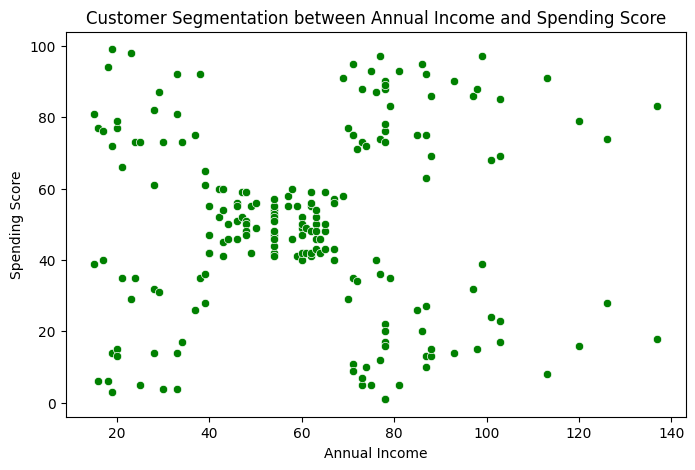

In [815]:
plt.figure(figsize=(8,5))

### perform the scatterplot based on the Relevant features from the dataset

sns.scatterplot(x = 'Annual_Income', y = 'Spending_Score', data=X,color='green')

plt.title('Customer Segmentation between Annual Income and Spending Score')

plt.xlabel('Annual Income')

plt.ylabel('Spending Score')

plt.show()

### OBSERVATIONS:

1. The above graph depicts about the Customer Segmentation between the Annual Income and the Spending Score.

### Step 6:  Scale the input data

In [816]:
from sklearn.preprocessing import StandardScaler

### create an object for Standard Scaler

sc = StandardScaler()

### scale the featured inputs to the same range

X_scaled = sc.fit_transform(X)

In [817]:
X_scaled

array([[-1.73899919, -0.43480148],
       [-1.73899919,  1.19570407],
       [-1.70082976, -1.71591298],
       [-1.70082976,  1.04041783],
       [-1.66266033, -0.39597992],
       [-1.66266033,  1.00159627],
       [-1.62449091, -1.71591298],
       [-1.62449091,  1.70038436],
       [-1.58632148, -1.83237767],
       [-1.58632148,  0.84631002],
       [-1.58632148, -1.4053405 ],
       [-1.58632148,  1.89449216],
       [-1.54815205, -1.36651894],
       [-1.54815205,  1.04041783],
       [-1.54815205, -1.44416206],
       [-1.54815205,  1.11806095],
       [-1.50998262, -0.59008772],
       [-1.50998262,  0.61338066],
       [-1.43364376, -0.82301709],
       [-1.43364376,  1.8556706 ],
       [-1.39547433, -0.59008772],
       [-1.39547433,  0.88513158],
       [-1.3573049 , -1.75473454],
       [-1.3573049 ,  0.88513158],
       [-1.24279661, -1.4053405 ],
       [-1.24279661,  1.23452563],
       [-1.24279661, -0.7065524 ],
       [-1.24279661,  0.41927286],
       [-1.20462718,

### OBSERVATIONS:

1.  All the featured inputs has been scaled in one range.

### Step 7:  Apply KMeans model and compute the silhouette scores for each data point

In [818]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

silhouettescore = []
### Take a for loop from 1 to 10 for choosing the clusters
for k in range(2,11):
    kmeans = KMeans(n_clusters=k,init='k-means++',random_state=42)

    ### using the object of kmeans train the model
    kmeans.fit(X_scaled)

    ### get the labels form the object 
    labels = kmeans.labels_

    ### obtain the silhouette score from the labels
    score = silhouette_score(X_scaled, labels)

    ### append every score to the empty list
    silhouettescore.append(score)

    print(f"For n_clusters = {k}, Silhouette Score = {score:.3f}")


For n_clusters = 2, Silhouette Score = 0.397
For n_clusters = 3, Silhouette Score = 0.467
For n_clusters = 4, Silhouette Score = 0.494
For n_clusters = 5, Silhouette Score = 0.555
For n_clusters = 6, Silhouette Score = 0.514
For n_clusters = 7, Silhouette Score = 0.502
For n_clusters = 8, Silhouette Score = 0.455
For n_clusters = 9, Silhouette Score = 0.457
For n_clusters = 10, Silhouette Score = 0.445


### OBSERVATIONS:

1. The silhouette score is obtained for each and every cluster.

### Step 8:  Visualize the Clusters vs silhouette scores

In [819]:
silhouettescore

[np.float64(0.3973270007887498),
 np.float64(0.46658474419000145),
 np.float64(0.49434988482196784),
 np.float64(0.5546571631111091),
 np.float64(0.5138257534676561),
 np.float64(0.50200146805547),
 np.float64(0.4550112502601921),
 np.float64(0.4566624374485964),
 np.float64(0.44475993501732874)]

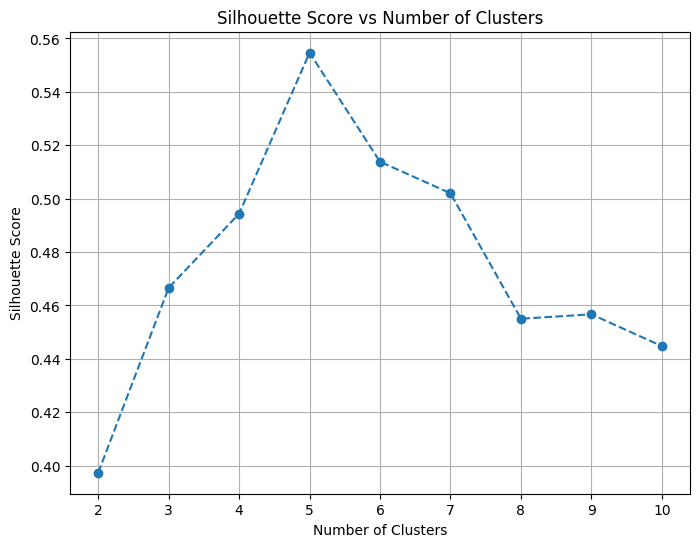

In [820]:
plt.figure(figsize=(8,6))
plt.plot(range(2,11),silhouettescore,marker='o', linestyle='--')
plt.title('Silhouette Score vs Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.grid(True)
plt.show()

### OBSERVATIONS:

1. The above graph shows the Silhouette scores for each and every cluster.

### Step 9: Train the KMeans model with optimal k value and assign the labels to the data

In [821]:
### Choose the optimal value for k

k = 5

### OBSERVATIONS:

1. As the from the above graph, it is seen that the silhouette score is the highest for k = 5. So the optimal value of k to be choosen is 5.

In [822]:
### using the value of k, train the KMeans model

kmeans = KMeans(n_clusters=k,init='k-means++',random_state=42)

### train the kmeans model
kmeans.fit(X_scaled)

### derieve the labels from the kmeans model

labels = kmeans.labels_

print(labels)

### assign the labels to the dataset

df['label'] = labels

[4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 0 4 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 1 3 1 0 1 3 1 3 1 0 1 3 1 3 1 3 1 3 1 0 1 3 1 3 1
 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1 3
 1 3 1 3 1 3 1 3 1 3 1 3 1 3 1]


In [823]:
df

,CustomerID,Gender,Age,Annual_Income,Spending_Score,label
0,1,Male,19,15,39,4
1,2,Male,21,15,81,2
2,3,Female,20,16,6,4
3,4,Female,23,16,77,2
4,5,Female,31,17,40,4
...,...,...,...,...,...,...
195,196,Female,35,120,79,1
196,197,Female,45,126,28,3
197,198,Male,32,126,74,1
198,199,Male,32,137,18,3


### OBSERVATIONS:

1.  After training the K-Means model and deriving the labels from it, these labels has been added to the dataset.

### Step 10:  Visualize final cluster

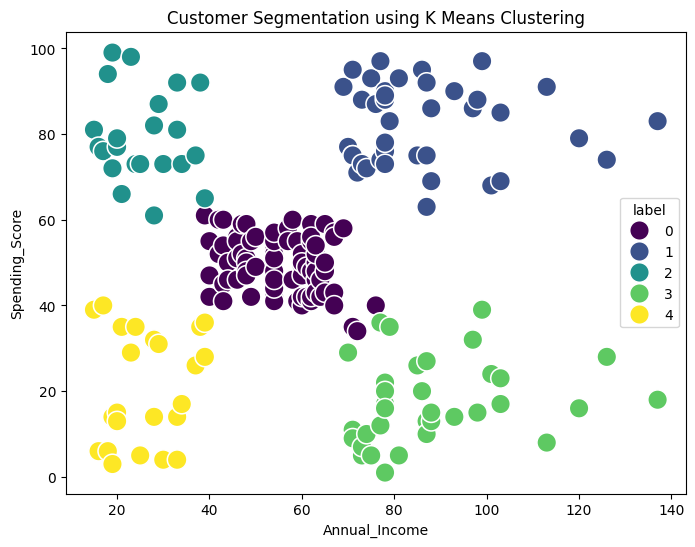

In [824]:
plt.figure(figsize=(8,6))

### perform the scatter plot on the fina dataset

sns.scatterplot(x="Annual_Income", y="Spending_Score", data=df,hue='label',s=200,palette='viridis')

plt.title("Customer Segmentation using K Means Clustering")

plt.show()

## OBSERVATIONS:

1.  The above graph depicts the clusters formed for every spending score w.r.to the annual income.

2. Type of correlation

  (a)  Cluster 0 ---> No correlation

  (b)  Cluster 1 ---> Higher the annual income, higher is the spending score

  (c)  Cluster 2 ---> lower the annual income, higher is the spending score

  (d) Cluster 3 ----> Higher the annual income, lower is the spending score

  (e) Cluster 4 ----> lower the annual income, lower is the spending score